In [ ]:
pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 15.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=ddab7dda91656f81426380a3776b118b749f278f8396a566155e9c198cde360c
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


# 1 ) Prediction of rainfall using fuzzy logic 

R. Janarthanan,R. Balamurali, A. Annapoorani, V. Vimala a
Department of CSE, Chennai Institute of Technology, Chennai, Tamil Nadu, India

Rain Fall result:
 5.6411711903020585


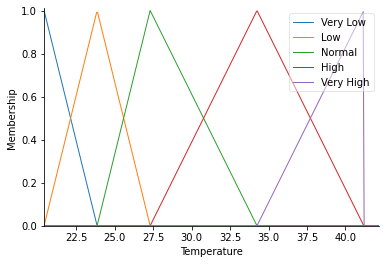

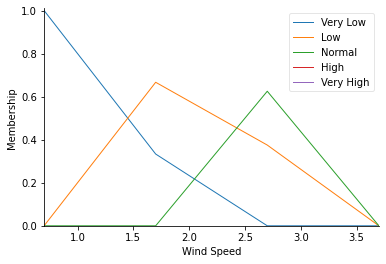

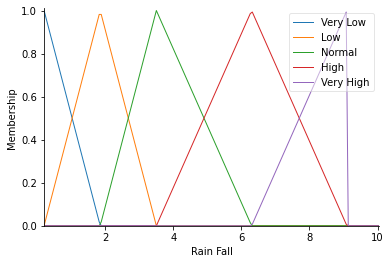

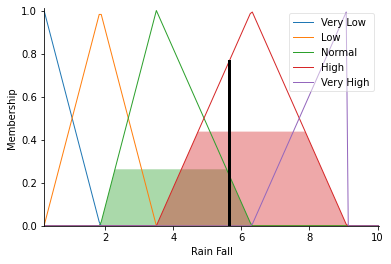

In [ ]:
#Fuzzy set
temperature =ctal.Antecedent(np.arange(20.4,42.2,0.06),'Temperature')
windSpeed   =ctal.Antecedent(np.arange(0.7,4.1,1),'Wind Speed')   
rainFall   =ctal.Consequent(np.arange(0.2,10.1,0.06),'Rain Fall') 

############################################################################
# Set Temperature Level
temperature['Very Low']=fuzz.trimf(temperature.universe,[20.4,20.4,23.85]) 
temperature['Low']=fuzz.trimf(temperature.universe,[20.4,23.85,27.3]) 
temperature['Normal']=fuzz.trimf(temperature.universe,[23.85,27.3,34.25]) 
temperature['High']=fuzz.trimf(temperature.universe,[27.3,34.25,41.2]) 
temperature['Very High']=fuzz.trimf(temperature.universe,[34.25,41.2,41.2]) 

# Set Wind Speed Level
windSpeed['Very Low']=fuzz.trimf(windSpeed.universe,[0.7,0.7,2.2]) 
windSpeed['Low']=fuzz.trimf(windSpeed.universe,[0.7,2.2,3.0])
windSpeed['Normal']=fuzz.trimf(windSpeed.universe,[2.2,3.0,3.05])
windSpeed['High']=fuzz.trimf(windSpeed.universe,[3.0,3.05,3.1])
windSpeed['Very High']=fuzz.trimf(windSpeed.universe,[3.05,3.1,3.1])

# Set Rain Fall Level
rainFall['Very Low']=fuzz.trimf(rainFall.universe,[0.2,0.2,1.85])
rainFall['Low']=fuzz.trimf(rainFall.universe,[0.2,1.85,3.5])
rainFall['Normal']=fuzz.trimf(rainFall.universe,[1.85,3.5,6.3])
rainFall['High']=fuzz.trimf(rainFall.universe,[3.5,6.3,9.1])
rainFall['Very High']=fuzz.trimf(rainFall.universe,[6.3,9.1,9.1])

#################################################################################
# Set Rule for Machine
rule_1=ctal.Rule(temperature['Very Low']&windSpeed['Very Low'],rainFall['Very Low'])
rule_2=ctal.Rule(temperature['Very Low']&windSpeed['Low'],rainFall['Low'])
rule_3=ctal.Rule(temperature['Very Low']&windSpeed['Normal'],rainFall['Low'])
rule_4=ctal.Rule(temperature['Very Low']&windSpeed['High'],rainFall['Normal'])
rule_5=ctal.Rule(temperature['Very Low']&windSpeed['Very High'],rainFall['Normal'])

rule_6=ctal.Rule(temperature['Low']&windSpeed['Very Low'],rainFall['Low'])
rule_7=ctal.Rule(temperature['Low']&windSpeed['Low'],rainFall['Low'])
rule_8=ctal.Rule(temperature['Low']&windSpeed['Normal'],rainFall['Low'])
rule_9=ctal.Rule(temperature['Low']&windSpeed['High'],rainFall['Normal'])
rule_10=ctal.Rule(temperature['Low']&windSpeed['Very High'],rainFall['Normal'])

rule_11=ctal.Rule(temperature['Normal']&windSpeed['Very Low'],rainFall['Low'])
rule_12=ctal.Rule(temperature['Normal']&windSpeed['Low'],rainFall['Low'])
rule_13=ctal.Rule(temperature['Normal']&windSpeed['Normal'],rainFall['Normal'])
rule_14=ctal.Rule(temperature['Normal']&windSpeed['High'],rainFall['High'])
rule_15=ctal.Rule(temperature['Normal']&windSpeed['Very High'],rainFall['High'])

rule_16=ctal.Rule(temperature['High']&windSpeed['Very Low'],rainFall['Normal'])
rule_17=ctal.Rule(temperature['High']&windSpeed['Low'],rainFall['Normal'])
rule_18=ctal.Rule(temperature['High']&windSpeed['Normal'],rainFall['High'])
rule_19=ctal.Rule(temperature['High']&windSpeed['High'],rainFall['High'])
rule_20=ctal.Rule(temperature['High']&windSpeed['Very High'],rainFall['High'])

rule_21=ctal.Rule(temperature['Very High']&windSpeed['Very Low'],rainFall['Normal'])
rule_22=ctal.Rule(temperature['Very High']&windSpeed['Low'],rainFall['Normal'])
rule_23=ctal.Rule(temperature['Very High']&windSpeed['Normal'],rainFall['High'])
rule_24=ctal.Rule(temperature['Very High']&windSpeed['High'],rainFall['High'])
rule_25=ctal.Rule(temperature['Very High']&windSpeed['Very High'],rainFall['Very High'])

######################################################################################
# Tectonics CONTROL SYSTEMS
rainning_ctal=ctal.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,
                                  rule_6,rule_7,rule_8,rule_9,rule_10,
                                  rule_11,rule_12,rule_13,rule_14,rule_15,
                                  rule_16,rule_17,rule_18,rule_19,rule_20,
                                  rule_21,rule_22,rule_23,rule_24,rule_25])

rainning=ctal.ControlSystemSimulation(rainning_ctal)

# Setup INPUT VALUE
rainning.input['Temperature']=35
rainning.input['Wind Speed'] = 4

#COMPUTING 
rainning.compute()

#SHOW RESULT
print("Rain Fall result:\n",rainning.output['Rain Fall'])
rainFall.view(sim=rainning)

# 2) Medical Diagnosis System Using Fuzzy Logic
J.B. Awotunde1, O.E. Matiluko2, O.W Fatai 3

In [ ]:
#Fuzzy Set
fever=ctal.Antecedent(np.arange(0,1.2,0.004),'Fever')
headache=ctal.Antecedent(np.arange(0,1.2,0.004),'Headache')
nausea=ctal.Antecedent(np.arange(0,1.2,0.004),'Nausea')
vomiting=ctal.Antecedent(np.arange(0,1.2,0.004),'Vomiting')
jaundice=ctal.Antecedent(np.arange(0,1.2,0.004),'Jaundice')
enlargeLiver=ctal.Antecedent(np.arange(0,1.2,0.004),'Enlarge Liver')
jointPain=ctal.Antecedent(np.arange(0,1.2,0.004),'Joint Pain')
bodyWeakness=ctal.Antecedent(np.arange(0,1.2,0.004),'Body Weakness')
dizziness=ctal.Antecedent(np.arange(0,1.2,0.004),'Dizziness')
lossOfappetite=ctal.Antecedent(np.arange(0,1.2,0.004),'Loss of Appentite')
mp=ctal.Antecedent(np.arange(0,1.2,0.004),'MP')
conclusion=ctal.Consequent(np.arange(0,1,0.004),'Conclusion')

###############################################################################3
#Fever membership function
fever['Minor']=fuzz.trimf(fever.universe,[0.1,0.2,0.3])
fever['Moderate']=fuzz.trimf(fever.universe,[0.3,0.45,0.6])
fever['Severe']=fuzz.trimf(fever.universe,[0.5,0.6,0.8])
fever['Very Severe']=fuzz.trimf(fever.universe,[0.8,0.9,1])

#Headache membership function
headache['Minor']=fuzz.trimf(headache.universe,[0.1,0.2,0.3])
headache['Moderate']=fuzz.trimf(headache.universe,[0.3,0.45,0.6])
headache['Severe']=fuzz.trimf(headache.universe,[0.5,0.6,0.8])
headache['Very Severe']=fuzz.trimf(headache.universe,[0.8,0.9,1])

#Nausea membership function
nausea['Minor']=fuzz.trimf(nausea.universe,[0.1,0.2,0.3])
nausea['Moderate']=fuzz.trimf(nausea.universe,[0.3,0.45,0.6])
nausea['Severe']=fuzz.trimf(nausea.universe,[0.5,0.6,0.8])
nausea['Very Severe']=fuzz.trimf(nausea.universe,[0.8,0.9,1])

#Vomiting membership function
vomiting['Minor']=fuzz.trimf(vomiting.universe,[0.1,0.2,0.3])
vomiting['Moderate']=fuzz.trimf(vomiting.universe,[0.3,0.45,0.6])
vomiting['Severe']=fuzz.trimf(vomiting.universe,[0.5,0.6,0.8])
vomiting['Very Severe']=fuzz.trimf(vomiting.universe,[0.8,0.9,1])

#Jaudice membership function
jaundice['Minor']=fuzz.trimf(jaundice.universe,[0.1,0.2,0.3])
jaundice['Moderate']=fuzz.trimf(jaundice.universe,[0.3,0.45,0.6])
jaundice['Severe']=fuzz.trimf(jaundice.universe,[0.5,0.6,0.8])
jaundice['Very Severe']=fuzz.trimf(jaundice.universe,[0.8,0.9,1])

#Enlarge Liver membership function
enlargeLiver['Minor']=fuzz.trimf(enlargeLiver.universe,[0.1,0.2,0.3])
enlargeLiver['Moderate']=fuzz.trimf(enlargeLiver.universe,[0.3,0.45,0.6])
enlargeLiver['Severe']=fuzz.trimf(enlargeLiver.universe,[0.5,0.6,0.8])
enlargeLiver['Very Severe']=fuzz.trimf(enlargeLiver.universe,[0.8,0.9,1])

#Joint Pain membership function
jointPain['Minor']=fuzz.trimf(jointPain.universe,[0.1,0.2,0.3])
jointPain['Moderate']=fuzz.trimf(jointPain.universe,[0.3,0.45,0.6])
jointPain['Severe']=fuzz.trimf(jointPain.universe,[0.5,0.6,0.8])
jointPain['Very Severe']=fuzz.trimf(jointPain.universe,[0.8,0.9,1])

#Body Weakness membership function
bodyWeakness['Minor']=fuzz.trimf(bodyWeakness.universe,[0.1,0.2,0.3])
bodyWeakness['Moderate']=fuzz.trimf(bodyWeakness.universe,[0.3,0.45,0.6])
bodyWeakness['Severe']=fuzz.trimf(bodyWeakness.universe,[0.5,0.6,0.8])
bodyWeakness['Very Severe']=fuzz.trimf(bodyWeakness.universe,[0.8,0.9,1])

#Dizziness membership function
dizziness['Minor']=fuzz.trimf(dizziness.universe,[0.1,0.2,0.3])
dizziness['Moderate']=fuzz.trimf(dizziness.universe,[0.3,0.45,0.6])
dizziness['Severe']=fuzz.trimf(dizziness.universe,[0.5,0.6,0.8])
dizziness['Very Severe']=fuzz.trimf(dizziness.universe,[0.8,0.9,1])

#Loss of Appetite membership function
lossOfappetite['Minor']=fuzz.trimf(lossOfappetite.universe,[0.1,0.2,0.3])
lossOfappetite['Moderate']=fuzz.trimf(lossOfappetite.universe,[0.3,0.45,0.6])
lossOfappetite['Severe']=fuzz.trimf(lossOfappetite.universe,[0.5,0.6,0.8])
lossOfappetite['Very Severe']=fuzz.trimf(lossOfappetite.universe,[0.8,0.9,1])

#MP membership function
mp['Minor']=fuzz.trimf(mp.universe,[0.1,0.2,0.3])
mp['Moderate']=fuzz.trimf(mp.universe,[0.3,0.45,0.6])
mp['Severe']=fuzz.trimf(mp.universe,[0.5,0.6,0.8])
mp['Very Severe']=fuzz.trimf(mp.universe,[0.8,0.9,1])

#Conclusion membership function
conclusion['Minor']=fuzz.trimf(conclusion.universe,[0.1,0.2,0.3])
conclusion['Moderate']=fuzz.trimf(conclusion.universe,[0.3,0.45,0.6])
conclusion['Severe']=fuzz.trimf(conclusion.universe,[0.5,0.6,0.8])
conclusion['Very Severe']=fuzz.trimf(conclusion.universe,[0.8,0.9,1])

#################################################################################
# Rule for Machine
rule_1=ctal.Rule(fever['Minor']&headache['Minor']&nausea['Minor']&vomiting['Minor']&jaundice['Minor']&enlargeLiver['Minor']&jointPain['Minor']&bodyWeakness['Minor']&dizziness['Minor']&lossOfappetite['Minor']&mp['Minor'],conclusion['Minor'])
rule_2=ctal.Rule(fever['Moderate']&headache['Minor']&nausea['Minor']&vomiting['Minor']&jaundice['Minor']&enlargeLiver['Minor']&jointPain['Moderate']&bodyWeakness['Moderate']&dizziness['Severe']&lossOfappetite['Severe']&mp['Moderate'],conclusion['Moderate'])
rule_3=ctal.Rule(fever['Severe']&headache['Moderate']&nausea['Minor']&vomiting['Minor']&jaundice['Minor']&enlargeLiver['Minor']&jointPain['Minor']&bodyWeakness['Severe']&dizziness['Severe']&lossOfappetite['Severe']&mp['Moderate'],conclusion['Severe'])
rule_4=ctal.Rule(fever['Very Severe']&headache['Minor']&nausea['Minor']&vomiting['Minor']&jaundice['Minor']&enlargeLiver['Minor']&jointPain['Severe']&bodyWeakness['Severe']&dizziness['Minor']&lossOfappetite['Minor']&mp['Severe'],conclusion['Very Severe'])
rule_5=ctal.Rule(fever['Moderate']&headache['Minor']&nausea['Minor']&vomiting['Moderate']&jaundice['Minor']&enlargeLiver['Minor']&jointPain['Moderate']&bodyWeakness['Moderate']&dizziness['Moderate']&lossOfappetite['Moderate']&mp['Moderate'],conclusion['Moderate'])

rule_6=ctal.Rule(fever['Minor']&headache['Moderate']&nausea['Moderate']&vomiting['Minor']&jaundice['Minor']&enlargeLiver['Minor']&jointPain['Minor']&bodyWeakness['Minor']&dizziness['Moderate']&lossOfappetite['Minor']&mp['Minor'],conclusion['Minor'])
rule_7=ctal.Rule(fever['Minor']&headache['Minor']&nausea['Moderate']&vomiting['Moderate']&jaundice['Minor']&enlargeLiver['Minor']&jointPain['Severe']&bodyWeakness['Severe']&dizziness['Moderate']&lossOfappetite['Moderate']&mp['Moderate'],conclusion['Severe'])
rule_8=ctal.Rule(fever['Moderate']&headache['Moderate']&nausea['Moderate']&vomiting['Moderate']&jaundice['Moderate']&enlargeLiver['Moderate']&jointPain['Moderate']&bodyWeakness['Moderate']&dizziness['Moderate']&lossOfappetite['Severe']&mp['Moderate'],conclusion['Moderate'])
rule_9=ctal.Rule(fever['Moderate']&headache['Minor']&nausea['Moderate']&vomiting['Moderate']&jaundice['Minor']&enlargeLiver['Severe']&jointPain['Moderate']&bodyWeakness['Moderate']&dizziness['Severe']&lossOfappetite['Moderate']&mp['Moderate'],conclusion['Moderate'])
rule_10=ctal.Rule(fever['Minor']&headache['Minor']&nausea['Moderate']&vomiting['Moderate']&jaundice['Minor']&enlargeLiver['Moderate']&jointPain['Minor']&bodyWeakness['Minor']&dizziness['Minor']&lossOfappetite['Minor']&mp['Minor'],conclusion['Minor'])

rule_11=ctal.Rule(fever['Severe']&headache['Severe']&nausea['Severe']&vomiting['Severe']&jaundice['Severe']&enlargeLiver['Severe']&jointPain['Severe']&bodyWeakness['Very Severe']&dizziness['Severe']&lossOfappetite['Severe']&mp['Moderate'],conclusion['Very Severe'])
rule_12=ctal.Rule(fever['Moderate']&headache['Severe']&nausea['Moderate']&vomiting['Severe']&jaundice['Moderate']&enlargeLiver['Severe']&jointPain['Moderate']&bodyWeakness['Severe']&dizziness['Moderate']&lossOfappetite['Minor']&mp['Moderate'],conclusion['Severe'])
rule_13=ctal.Rule(fever['Minor']&headache['Moderate']&nausea['Moderate']&vomiting['Moderate']&jaundice['Minor']&enlargeLiver['Minor']&jointPain['Minor']&bodyWeakness['Moderate']&dizziness['Minor']&lossOfappetite['Moderate']&mp['Moderate'],conclusion['Moderate'])
rule_14=ctal.Rule(fever['Severe']&headache['Severe']&nausea['Moderate']&vomiting['Severe']&jaundice['Severe']&enlargeLiver['Severe']&jointPain['Severe']&bodyWeakness['Severe']&dizziness['Moderate']&lossOfappetite['Moderate']&mp['Severe'],conclusion['Severe'])
rule_15=ctal.Rule(fever['Minor']&headache['Minor']&nausea['Minor']&vomiting['Moderate']&jaundice['Minor']&enlargeLiver['Minor']&jointPain['Minor']&bodyWeakness['Severe']&dizziness['Minor']&lossOfappetite['Severe']&mp['Moderate'],conclusion['Severe'])

rule_16=ctal.Rule(fever['Very Severe']&headache['Moderate']&nausea['Minor']&vomiting['Moderate']&jaundice['Severe']&enlargeLiver['Moderate']&jointPain['Minor']&bodyWeakness['Severe']&dizziness['Severe']&lossOfappetite['Minor']&mp['Moderate'],conclusion['Very Severe'])
rule_17=ctal.Rule(fever['Minor']&headache['Very Severe']&nausea['Moderate']&vomiting['Moderate']&jaundice['Minor']&enlargeLiver['Moderate']&jointPain['Minor']&bodyWeakness['Very Severe']&dizziness['Very Severe']&lossOfappetite['Minor']&mp['Moderate'],conclusion['Very Severe'])
rule_18=ctal.Rule(fever['Moderate']&headache['Very Severe']&nausea['Very Severe']&vomiting['Minor']&jaundice['Severe']&enlargeLiver['Severe']&jointPain['Moderate']&bodyWeakness['Severe']&dizziness['Very Severe']&lossOfappetite['Very Severe']&mp['Severe'],conclusion['Very Severe'])
rule_19=ctal.Rule(fever['Moderate']&headache['Moderate']&nausea['Moderate']&vomiting['Moderate']&jaundice['Minor']&enlargeLiver['Minor']&jointPain['Moderate']&bodyWeakness['Moderate']&dizziness['Moderate']&lossOfappetite['Moderate']&mp['Moderate'],conclusion['Moderate'])
rule_20=ctal.Rule(fever['Very Severe']&headache['Severe']&nausea['Severe']&vomiting['Severe']&jaundice['Severe']&enlargeLiver['Severe']&jointPain['Severe']&bodyWeakness['Severe']&dizziness['Severe']&lossOfappetite['Severe']&mp['Moderate'],conclusion['Very Severe'])

#######################################################################################
# Tectonics CONTROL SYSTEMS
result_ctal=ctal.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,
                                rule_6,rule_7,rule_8,rule_9,rule_10,
                                rule_11,rule_12,rule_13,rule_14,rule_15,
                                rule_16,rule_17,rule_18,rule_19,rule_20,])

# Setup input
result=ctal.ControlSystemSimulation(result_ctal)
result.input['Fever']= 0.342
result.input['Headache']= 0.156
result.input['Nausea']= 0.745
result.input['Vomiting']= 0.36
result.input['Jaundice']= 0.412
result.input['Enlarge Liver']= 0.895
result.input['Joint Pain']= 0.62
result.input['Body Weakness']= 0.13
result.input['Dizziness']= 0.78
result.input['Loss of Appentite']= 0.49
result.input['MP']= 0.54
result.compute()
print(result.output['Conclusion'])
conclusion.view(sim=result)


# 3) Fuzzy logic–based clinical decision support system for the evaluation of renal function in post‐Transplant Patients

Giovanni Improta Researcher1 | Valeria Mazzella Master Degree2 |
Donatella Vecchione PhD2 | Stefania Santini Professors2 | Maria Triassi Professors1

In [ ]:
# Fuzzy Set
glyceamia = ctal.Antecedent(np.arange(70,126,1),'Glyceamia')
sirolimus = ctal.Antecedent(np.arange(0,21,0.04),'Sirolimus')
diffAce = ctal.Antecedent(np.arange(0,11,0.04),'Diff Ace')
cyclosporine = ctal.Antecedent(np.arange(0,21,0.04),'Cyclosporine')
gfrlevel = ctal.Consequent(np.arange(10,90,1),'GFR Level')
proteinuria = ctal.Consequent(np.arange(150,3501,1),'Proteinuria')

#####################################################################################
# Set Glyceamia
glyceamia['Good']=fuzz.trimf(glyceamia.universe,[70,70,100])
glyceamia['Alarm']=fuzz.trimf(glyceamia.universe,[70,100,125])
glyceamia['Danger']=fuzz.trimf(glyceamia.universe,[100,125,125])

# Set Sirolimus 
sirolimus['Alarm Down']=fuzz.trimf(sirolimus.universe,[0,5,7])
sirolimus['Sufficient']=fuzz.trimf(sirolimus.universe,[4,7,12])
sirolimus['Good']=fuzz.trimf(sirolimus.universe,[6,12,14])
sirolimus['Alarm Up']=fuzz.trimf(sirolimus.universe,[11,14,20])
sirolimus['Danger']=fuzz.trimf(sirolimus.universe,[13,20,20])

# Set DiffAce 
diffAce['Level 0']=fuzz.trimf(diffAce.universe,[0,0,1.25])
diffAce['Level 1']=fuzz.trimf(diffAce.universe,[0,1.25,2.5])
diffAce['Level 2']=fuzz.trimf(diffAce.universe,[1.25,2.5,5])
diffAce['Level 3']=fuzz.trimf(diffAce.universe,[2.5,5,10])
diffAce['Level 4']=fuzz.trimf(diffAce.universe,[5,10,10])

# Set Cyclosporine 
cyclosporine['Alarm Down']=fuzz.trimf(cyclosporine.universe,[0,2,5])
cyclosporine['Good']=fuzz.trimf(cyclosporine.universe,[1.5,5,8])
cyclosporine['Sufficient']=fuzz.trimf(cyclosporine.universe,[4,11,15])
cyclosporine['Alarm Up']=fuzz.trimf(cyclosporine.universe,[8,15,20])
cyclosporine['Danger']=fuzz.trimf(cyclosporine.universe,[12,20,20])

# Set Gfrlevel
gfrlevel['Good']=fuzz.trimf(gfrlevel.universe,[10,10,15])
gfrlevel['Alarm 2']=fuzz.trimf(gfrlevel.universe,[10,15,30])
gfrlevel['Alarm 3']=fuzz.trimf(gfrlevel.universe,[15,30,60])
gfrlevel['Alarm 4']=fuzz.trimf(gfrlevel.universe,[30,60,90])
gfrlevel['Danger']=fuzz.trimf(gfrlevel.universe,[60,90,90])

# Set Proteinuria
proteinuria['Good']=fuzz.trimf(proteinuria.universe,[150,150,500])
proteinuria['Sufficient']=fuzz.trimf(proteinuria.universe,[150,500,1000])
proteinuria['Alterate']=fuzz.trimf(proteinuria.universe,[500,1000,3000])
proteinuria['Alarm']=fuzz.trimf(proteinuria.universe,[1000,3000,3500])
proteinuria['Danger']=fuzz.trimf(proteinuria.universe,[3000,3500,3500])

##########################################################################################
# Rule for Machine

#Case Study 1
# Output Proteinuria (8 rules)
rule_1=ctal.Rule(glyceamia['Good']&sirolimus['Good'],proteinuria['Good'])
rule_2=ctal.Rule(glyceamia['Danger']&sirolimus['Danger'],proteinuria['Danger'])
rule_3=ctal.Rule(glyceamia['Good']&sirolimus['Sufficient'],proteinuria['Sufficient'])
rule_4=ctal.Rule(glyceamia['Alarm']&sirolimus['Alarm Up'],proteinuria['Alarm'])
rule_5=ctal.Rule(glyceamia['Alarm']&sirolimus['Sufficient'],proteinuria['Alterate'])
rule_6=ctal.Rule(glyceamia['Good']&sirolimus['Alarm Up'],proteinuria['Alterate'])
rule_7=ctal.Rule(glyceamia['Alarm']&sirolimus['Good'],proteinuria['Sufficient'])
rule_8=ctal.Rule(glyceamia['Good']&sirolimus['Alarm Down'],proteinuria['Sufficient'])

# Output GFR Level (7 rules)
rule_17=ctal.Rule(glyceamia['Danger']&cyclosporine['Danger'],gfrlevel['Danger'])
rule_18=ctal.Rule(glyceamia['Good']&cyclosporine['Danger'],gfrlevel['Alarm 3'])
rule_19=ctal.Rule(glyceamia['Alarm']&cyclosporine['Alarm Up'],gfrlevel['Alarm 4'])
rule_20=ctal.Rule(glyceamia['Good']&cyclosporine['Sufficient'],gfrlevel['Alarm 2'])
rule_21=ctal.Rule(glyceamia['Good']&cyclosporine['Good'],gfrlevel['Good'])
rule_22=ctal.Rule(glyceamia['Alarm']&cyclosporine['Good'],gfrlevel['Alarm 2'])
rule_23=ctal.Rule(glyceamia['Danger']&cyclosporine['Good'],gfrlevel['Alarm 3'])


#Case Study 2
# Output Proteinuria (8 rules)
rule_9=ctal.Rule(glyceamia['Alarm']&diffAce['Level 2'],proteinuria['Sufficient'])
rule_10=ctal.Rule(glyceamia['Good']&diffAce['Level 1'],proteinuria['Sufficient'])
rule_11=ctal.Rule(glyceamia['Alarm']&diffAce['Level 1'],proteinuria['Alterate'])
rule_12=ctal.Rule(glyceamia['Danger']&diffAce['Level 1'],proteinuria['Alarm'])
rule_13=ctal.Rule(glyceamia['Alarm']&diffAce['Level 3'],proteinuria['Alarm'])
rule_14=ctal.Rule(glyceamia['Good']&diffAce['Level 3'],proteinuria['Alterate'])
rule_15=ctal.Rule(glyceamia['Danger']&diffAce['Level 4'],proteinuria['Danger'])
rule_16=ctal.Rule(glyceamia['Good']&diffAce['Level 0'],proteinuria['Good'])

rule_33=ctal.Rule(glyceamia['Alarm']&diffAce['Level 0'],proteinuria['Sufficient'])
rule_34=ctal.Rule(glyceamia['Danger']&diffAce['Level 0'],proteinuria['Alarm'])
rule_35=ctal.Rule(glyceamia['Good']&diffAce['Level 2'],proteinuria['Alterate'])
rule_36=ctal.Rule(glyceamia['Alarm']&diffAce['Level 2'],proteinuria['Sufficient'])
rule_37=ctal.Rule(glyceamia['Danger']&diffAce['Level 2'],proteinuria['Alarm'])
rule_38=ctal.Rule(glyceamia['Danger']&diffAce['Level 3'],proteinuria['Alarm'])
rule_39=ctal.Rule(glyceamia['Good']&diffAce['Level 3'],proteinuria['Sufficient'])
rule_40=ctal.Rule(glyceamia['Alarm']&diffAce['Level 4'],proteinuria['Danger'])

# Output GFR Level (9 rules)
rule_24=ctal.Rule(glyceamia['Good']&diffAce['Level 2'],gfrlevel['Alarm 3'])
rule_25=ctal.Rule(glyceamia['Alarm']&diffAce['Level 2'],gfrlevel['Alarm 3'])
rule_26=ctal.Rule(glyceamia['Good']&diffAce['Level 1'],gfrlevel['Alarm 2'])
rule_27=ctal.Rule(glyceamia['Alarm']&diffAce['Level 1'],gfrlevel['Alarm 2'])
rule_28=ctal.Rule(glyceamia['Good']&diffAce['Level 3'],gfrlevel['Alarm 3'])
rule_29=ctal.Rule(glyceamia['Danger']&diffAce['Level 3'],gfrlevel['Alarm 4'])
rule_30=ctal.Rule(glyceamia['Good']&diffAce['Level 4'],gfrlevel['Alarm 2'])
rule_31=ctal.Rule(glyceamia['Good']&diffAce['Level 0'],gfrlevel['Good'])
rule_32=ctal.Rule(glyceamia['Danger']&diffAce['Level 4'],gfrlevel['Danger'])

#OUTPUT COMPUTE
proteinuria_case1_ctal=ctal.ControlSystem([rule_1,rule_2,rule_3,rule_4,
                                           rule_5,rule_6,rule_7,rule_8])

gfrlevel_case1_ctal=ctal.ControlSystem([rule_17,rule_18,rule_19,rule_20,
                                        rule_21,rule_22,rule_23])

proteinuria_case2_ctal=ctal.ControlSystem([rule_9,rule_10,rule_11,rule_12,
                                           rule_13,rule_14,rule_15,rule_16,
                                           rule_33,rule_34,rule_35,rule_36,
                                           rule_37,rule_38,rule_39,rule_40])

gfrlevel_case2_ctal=ctal.ControlSystem([rule_24,rule_25,rule_26,rule_27,rule_28,
                                        rule_29,rule_30,rule_31,rule_32])

# Simulation
proteinuria_case1 = ctal.ControlSystemSimulation(proteinuria_case1_ctal)
proteinuria_case2 = ctal.ControlSystemSimulation(proteinuria_case2_ctal)
gfrlevel_case1 = ctal.ControlSystemSimulation(gfrlevel_case1_ctal)
gfrlevel_case2 = ctal.ControlSystemSimulation(gfrlevel_case2_ctal)

#4 Input
proteinuria_case1.input['Glyceamia']= 100 # 100 = alarm
proteinuria_case1.input['Sirolimus']= 14  # alarm up

proteinuria_case2.input['Glyceamia']= 100 # 100 = alarm
proteinuria_case2.input['Diff Ace']= 3

gfrlevel_case1.input['Glyceamia']= 100
gfrlevel_case1.input['Cyclosporine']= 2

gfrlevel_case2.input['Glyceamia']= 125
gfrlevel_case2.input['Diff Ace']=  5
#2 Output compute
proteinuria_case1.compute()
proteinuria_case2.compute()

gfrlevel_case1.compute()
gfrlevel_case2.compute()

#View Output
print('Case Study 1 Proteinuria Level:',proteinuria_case1.output['Proteinuria'])
proteinuria.view(sim=proteinuria_case1)

print('Case Study 2 Proteinuria Level:',proteinuria_case2.output['Proteinuria'])
proteinuria.view(sim=proteinuria_case2)

print('Case Study 1 GFR Level:',gfrlevel_case1.output['GFR Level'])
gfrlevel.view(sim=gfrlevel_case1)

print('Case Study 2 GFR Level:',gfrlevel_case2.output['GFR Level'])
gfrlevel.view(sim=gfrlevel_case2)

# 4) Adaptive Food Suggestion Engine by Fuzzy Logic 

Tousif Osman, Maisha Mahjabeen,Shahreen Shahjahan Psyche, Afsana Imam Urmi, 
J.M.Shafi Ferdous, Rashedur M Rahman

In [ ]:
#Fuzzy set
taste =ctal.Antecedent(np.arange(0,11,1),'Taste')
environment=ctal.Antecedent(np.arange(0,11,1),'Environment')   
budget=ctal.Antecedent(np.arange(0,10,1),'Budget')
userReview=ctal.Antecedent(np.arange(0,10,1),'User Review')
location=ctal.Antecedent(np.arange(1,3,1),'Location')
level=ctal.Consequent(np.arange(0,10,0.06),'Level') 

##########################################################
# Set Taste Level
taste['Low']=fuzz.trimf(taste.universe,[0,0,5])
taste['Medium']=fuzz.trimf(taste.universe,[0,5,10])
taste['High']=fuzz.trimf(taste.universe,[5,10,10])

# Set Environment Level
environment['Low']=fuzz.trimf(environment.universe,[0,0,5])
environment['Medium']=fuzz.trimf(environment.universe,[0,5,10])
environment['High']=fuzz.trimf(environment.universe,[5,10,10])

# Set Budget Level
budget['More Preferred']=fuzz.trimf(budget.universe,[0,3,6])
budget['Preferred']=fuzz.trimf(budget.universe,[3,6,9])
budget['Less Preferred']=fuzz.trimf(budget.universe,[6,9,9])

# Set UserReview Level
userReview['More Preferred']=fuzz.trimf(userReview.universe,[0,3,6])
userReview['Preferred']=fuzz.trimf(userReview.universe,[3,6,9])
userReview['Less Preferred']=fuzz.trimf(userReview.universe,[6,9,9])

# Set Location Level
location['Close']=fuzz.trimf(location.universe,[1,1,3])
location['Near']=fuzz.trimf(location.universe,[1,2,3])
location['Far']=fuzz.trimf(location.universe,[2,3,3])

# Set Level
level['Level 1']=fuzz.trimf(level.universe,[0,1.5,3])
level['Level 2']=fuzz.trimf(level.universe,[1.5,3,4.5])
level['Level 3']=fuzz.trimf(level.universe,[3,4.5,6])
level['Level 4']=fuzz.trimf(level.universe,[4.5,6,7.5])
level['Level 5']=fuzz.trimf(level.universe,[6,7.5,9])

############################################################################
# Set Rule for Machine

#level 1
# Every stament lowest and one medium stament
rule_1=ctal.Rule(taste['Medium'] & environment['Low'] & budget ['Less Preferred'] & location ['Far'] & userReview['Less Preferred'],level['Level 1'])
rule_2=ctal.Rule(taste['Low'] & environment['Medium'] & budget ['Less Preferred'] & location ['Far'] & userReview['Less Preferred'],level['Level 1'])
rule_3=ctal.Rule(taste['Low'] & environment['Low'] & budget ['Preferred'] & location ['Far'] & userReview['Less Preferred'],level['Level 1'])
rule_4=ctal.Rule(taste['Low'] & environment['Low'] & budget ['Less Preferred'] & location ['Near'] & userReview['Less Preferred'],level['Level 1'])
rule_5=ctal.Rule(taste['Low'] & environment['Low'] & budget ['Less Preferred'] & location ['Far'] & userReview['Preferred'],level['Level 1'])

#level 2
# Every stament medium and one low stament
rule_12=ctal.Rule(taste['Low'] & environment['Medium'] & budget ['Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 2'])
rule_13=ctal.Rule(taste['Medium'] & environment['Low'] & budget ['Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 2'])
rule_14=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Less Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 2'])
rule_15=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Preferred'] & location ['Far'] & userReview['Preferred'],level['Level 2'])
rule_16=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Preferred'] & location ['Near'] & userReview['Less Preferred'],level['Level 2'])
# Every stament medium and two lowe stament
rule_22=ctal.Rule(taste['Low'] & environment['Low'] & budget ['Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 2'])
rule_23=ctal.Rule(taste['Medium'] & environment['Low'] & budget ['Less Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 2'])
rule_24=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Less Preferred'] & location ['Far'] & userReview['Preferred'],level['Level 2'])
rule_25=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Preferred'] & location ['Far'] & userReview['Less Preferred'],level['Level 2'])
rule_26=ctal.Rule(taste['Low'] & environment['Medium'] & budget ['Preferred'] & location ['Near'] & userReview['Less Preferred'],level['Level 2'])

#level 3 # Every stament medium 
rule_6=ctal.Rule(taste['Medium'] & environment ['Medium'] & budget ['Preferred'] & userReview['Preferred'] & location ['Near'] , level['Level 3'])
# Every stament medium and 1 lowe stament and 1 high stament
rule_32=ctal.Rule(taste['High'] & environment ['Low'] & budget ['Preferred'] & userReview['Preferred'] & location ['Near'] , level['Level 3'])
rule_33=ctal.Rule(taste['Medium'] & environment ['High'] & budget ['Less Preferred'] & userReview['Preferred'] & location ['Near'] , level['Level 3'])
rule_34=ctal.Rule(taste['Medium'] & environment ['Medium'] & budget ['More Preferred'] & userReview['Less Preferred'] & location ['Near'] , level['Level 3'])
rule_35=ctal.Rule(taste['Medium'] & environment ['Medium'] & budget ['Preferred'] & userReview['More Preferred'] & location ['Far'] , level['Level 3'])
rule_36=ctal.Rule(taste['Low'] & environment ['Medium'] & budget ['Preferred'] & userReview['Preferred'] & location ['Close'] , level['Level 3'])

#level 4
# Every stament medium and one high stament
rule_17=ctal.Rule(taste['High'] & environment['Medium'] & budget ['Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 4'])
rule_18=ctal.Rule(taste['Medium'] & environment['High'] & budget ['Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 4'])
rule_19=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['More Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 4'])
rule_20=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Preferred'] & location ['Close'] & userReview['Preferred'],level['Level 4'])
rule_21=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Preferred'] & location ['Near'] & userReview['More Preferred'],level['Level 4'])
# Every stament medium and two high stament
rule_27=ctal.Rule(taste['High'] & environment['High'] & budget ['Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 4'])
rule_28=ctal.Rule(taste['Medium'] & environment['High'] & budget ['More Preferred'] & location ['Near'] & userReview['Preferred'],level['Level 4'])
rule_29=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['More Preferred'] & location ['Close'] & userReview['Preferred'],level['Level 4'])
rule_30=ctal.Rule(taste['Medium'] & environment['Medium'] & budget ['Preferred'] & location ['Close'] & userReview['More Preferred'],level['Level 4'])
rule_31=ctal.Rule(taste['High'] & environment['Medium'] & budget ['Preferred'] & location ['Near'] & userReview['More Preferred'],level['Level 4'])

#level 5
# Every stament high and one medium stament
rule_7=ctal.Rule(taste['Medium'] & environment['High'] & budget ['More Preferred'] & location ['Close'] & userReview['More Preferred'],level['Level 5'])
rule_8=ctal.Rule(taste['High'] & environment['Medium'] & budget ['More Preferred'] & location ['Close'] & userReview['More Preferred'],level['Level 5'])
rule_9=ctal.Rule(taste['High'] & environment['High'] & budget ['Preferred'] & location ['Close'] & userReview['More Preferred'],level['Level 5'])
rule_10=ctal.Rule(taste['High'] & environment['High'] & budget ['More Preferred'] & location ['Near'] & userReview['More Preferred'],level['Level 5'])
rule_11=ctal.Rule(taste['High'] & environment['High'] & budget ['More Preferred'] & location ['Close'] & userReview['Preferred'],level['Level 5'])

#######################################################################################
# Tectonics CONTROL SYSTEMS
leveling_ctal=ctal.ControlSystem([rule_1,rule_2,rule_3,rule_4,rule_5,rule_6,
                                  rule_7,rule_8,rule_9,rule_10,rule_11,rule_12,
                                  rule_13,rule_14,rule_15,rule_16,rule_17,rule_18,
                                  rule_19,rule_20,rule_21,rule_22,rule_23,rule_24,
                                  rule_25,rule_26,rule_27,rule_28,rule_29,rule_30,
                                  rule_31,rule_32,rule_33,rule_34,rule_35,rule_36])

#View and Computing data
leveling=ctal.ControlSystemSimulation(leveling_ctal)
leveling.input['Taste']= 7
leveling.input['Environment']=4
leveling.input['Budget']=9             
leveling.input['User Review']=8
leveling.input['Location']= 1
leveling.compute()
print(leveling.output['Level'])
level.view(leveling)

